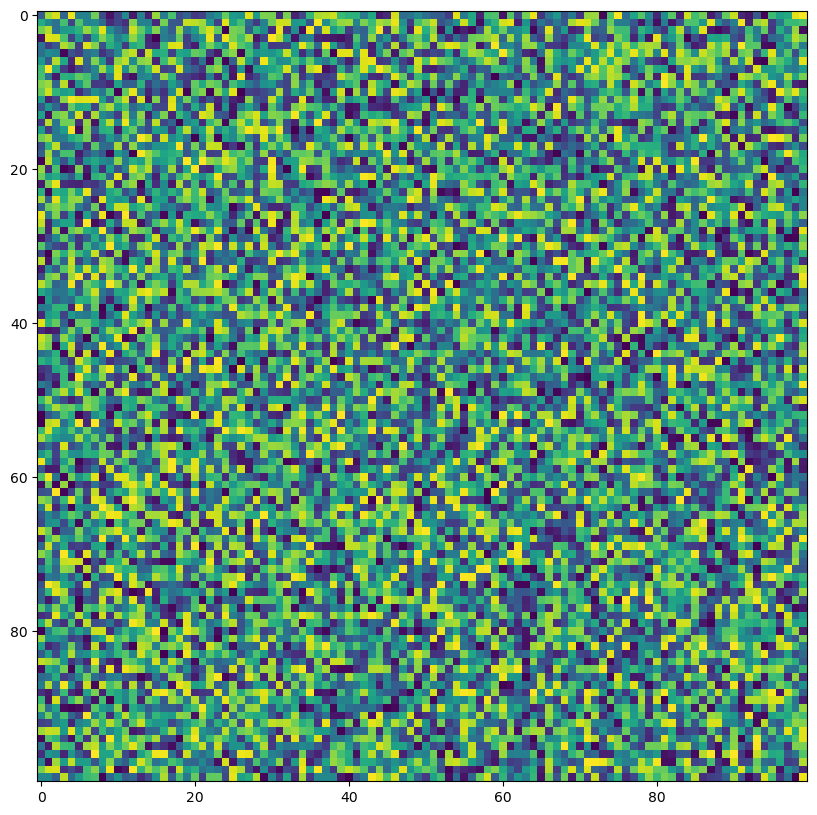

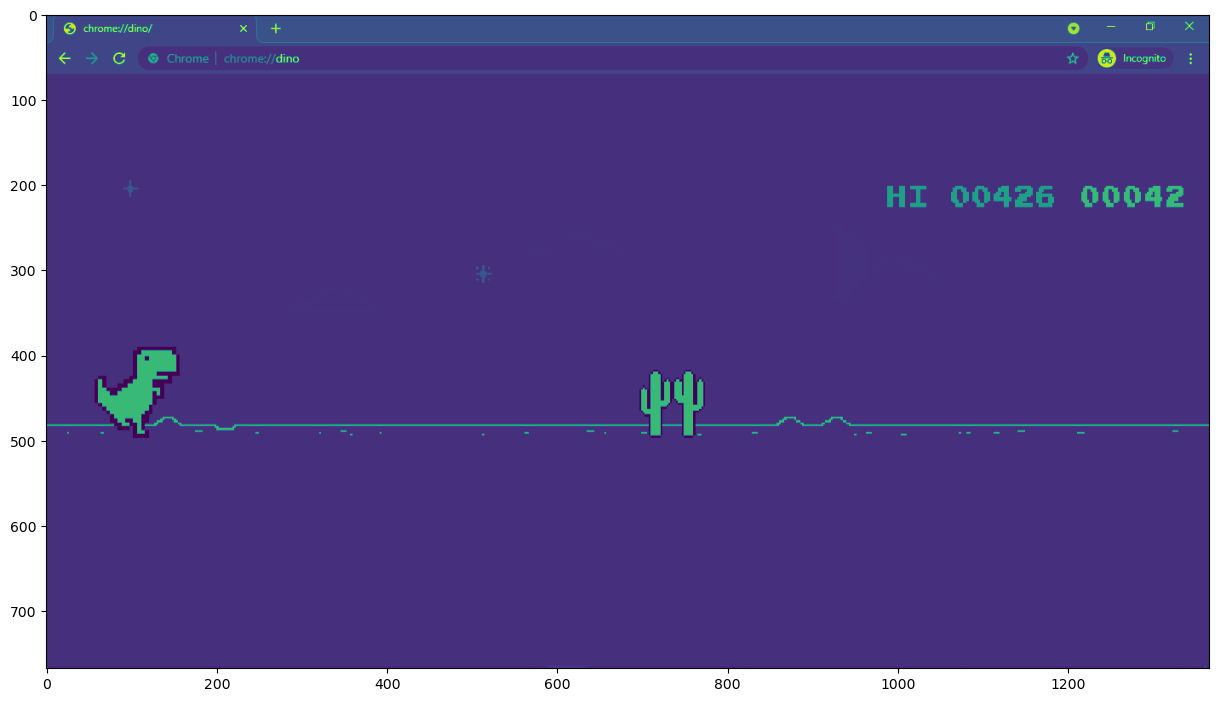

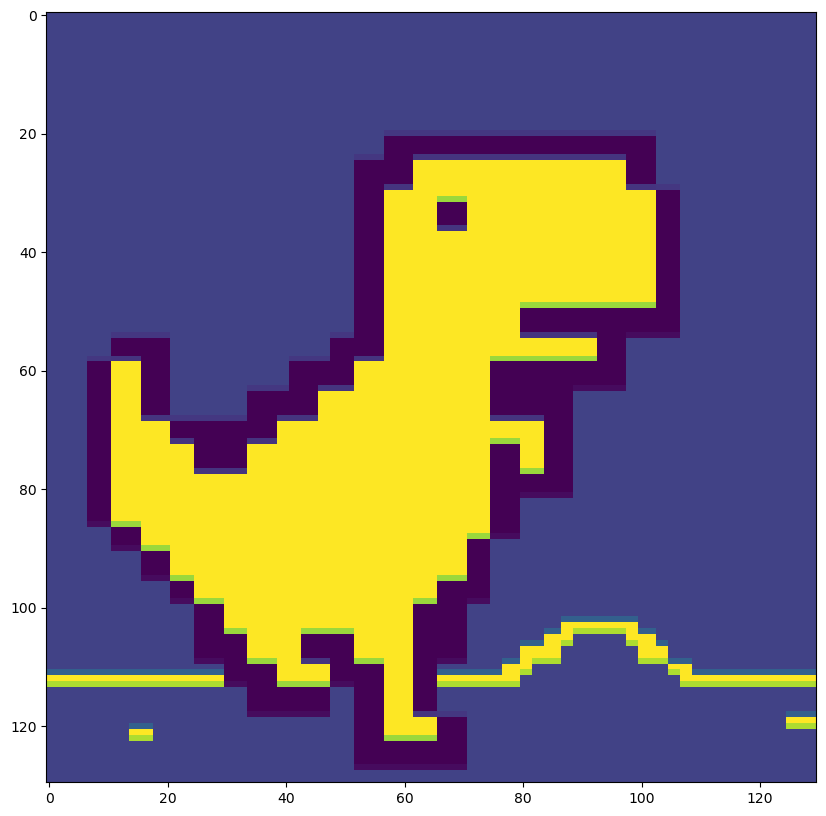

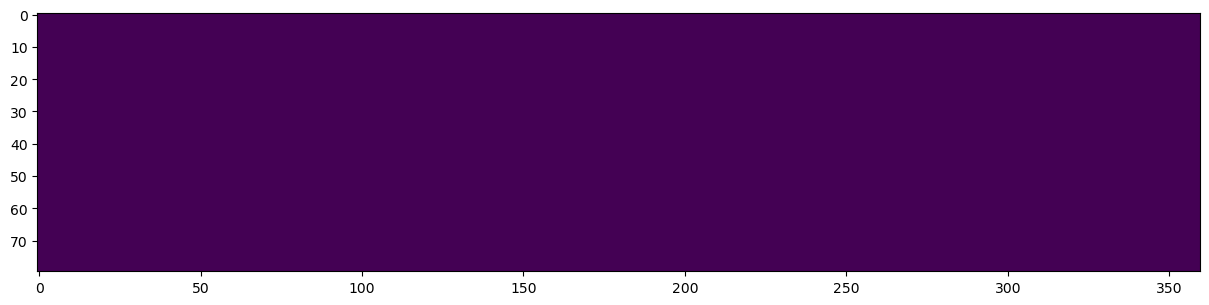

PyAutoGUIException: PyAutoGUI was unable to import pyscreeze. (This is likely because you're running a version of Python that Pillow (which pyscreeze depends on) doesn't support currently.) Please install this module to enable the function you tried to call.

In [1]:
import pyautogui
import numpy as np
import tkinter as tk
import cv2
import matplotlib.pyplot as plt
import keyboard

def show(img, fsize=(10,10)):
    figure=plt.figure(figsize=fsize)
    plt.imshow(img)
    plt.show()
show(np.random.randint(0, 255, (100, 100)))

root = tk.Tk()

screen_width = root.winfo_screenwidth()
screen_height = root.winfo_screenheight()

ssize = (screen_height, screen_width)
ssize


game_window = cv2.imread("chrome_dino.png", 0)
show(game_window, (15, 15))

brr1,brr2,brc1,brc2 = 370, 450, 160, 520
trr1,trr2,trc1,trc2 = 170, 370, 160, 600

troi = game_window[trr1:trr2, trc1:trc2]
broi = game_window[brr1:brr2, brc1:brc2]
dino = game_window[370:500, 50:180]
show(dino)
show(broi, fsize=(15, 15))    


resolution = ssize 
cv2.namedWindow('live', cv2.WINDOW_NORMAL)
cv2.resizeWindow("live", 480, 270)

fc = 0
increase_every = 7

while True:
    img = pyautogui.screenshot()
    
            
    frame = np.array(img)
    gframe = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
    
    frame_roi = gframe[brr1:brr2, brc1:brc2]
    broi = game_window[brr1:brr2, brc1:brc2]
    
    res = cv2.matchTemplate(gframe, dino, cv2.TM_CCOEFF_NORMED)
    
    th = 0.5
    w, h = dino.shape
    loc = np.where(res>=th)
    #print(loc)
    if len(loc[0]>=1):
        game_stat = "start"
        if fc==increase_every:
            fc = 0
            brc2 += 1
            print("Increased brc2 to: ", brc2)
            if brc2>resolution[1]:
                brc2=resolution[1]
            broi = game_window[brr1:brr2, brc1:brc2]
            frame_roi = gframe[brr1:brr2, brc1:brc2]
                
        if np.abs(loc[0].max()-370)<=20:
            diff = cv2.absdiff(frame_roi.astype(np.float32), broi.astype(np.float32)).astype(np.uint8)

            diff[diff<50] = 0
            diff[diff>=50] = 255

            if (diff==255).sum() > 100:
                keyboard.press_and_release("space")
                fc+=1
                
            cv2.imshow("diff", diff)
    else:
        game_state="pause"
        brr1,brr2,brc1,brc2 = 370, 450, 160, 520
    
    cv2.imshow("live", frame)
    
    
    if cv2.waitKey(1) &0xFF == 27:
        break
cv2.destroyAllWindows()